# Goal: 

Plot Mobile Clicks Over Time
<br>Null hypothesis: There is no change in click frequencies over time
<br>*Should be noted that clicks will likely decrease over time anyway because of dropout...solution...look at individual user clicks

***What have I done below?***
<br>-created dataframe with relevant fields (including time, excluding NaN values)
<br>-converted time to a string 
<br>-counted number of clicks for a specified number of top users PER WEEK
<br>-plotted usage over weeks
<br>***What can we (gently) conclude from the data?***
<br>-no immediate patterns stick out in the first 10 users
<br>-big outlier...probs course administrator
<br>-the top mobile users do use mobile most weeks (at least for the first 9 weeks)(course is 9 weeks)
<br>-there is generally no steady decline or sudden drop off 
<br>***Any issues?***
<br>-original issues were resolved!
<br>-I want to plot a single user's mobile and non_mobile usage over time, right now it's just mobile
<br>-I also want to look at event clicks as a fraction of total clicks (sep notebook)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import datetime
from sklearn import preprocessing
from no_PII_Storage_folder import *

datetimeFormat = '%Y-%m-%d %H:%M:%S.%f %Z'

In [64]:
%run all_utilities.ipynb

In [55]:
user_data_org = pd.read_csv(r'\ALL_DATA.csv')
mobile_data_org = pd.read_csv(r'MOBILE_DATA.csv')
non_mobile_data_org = pd.read_csv(r'NON_MOBILE_DATA.csv')

user_data_org = user_data_org.drop(['Unnamed: 0'], axis = 1)
mobile_data_org = mobile_data_org.drop(['Unnamed: 0'], axis = 1)
non_mobile_data_org = non_mobile_data_org.drop(['Unnamed: 0'], axis = 1)

In [67]:
user_data = user_data_org
mobile_data = mobile_data_org
non_mobile_data = non_mobile_data_org

#print(non_mobile_data.isna().any())

user_data = user_data.dropna()
user_data = user_data.reset_index(drop=True)
mobile_data = mobile_data.dropna()
mobile_data = mobile_data.reset_index(drop=True)
non_mobile_data = non_mobile_data.dropna()
non_mobile_data = non_mobile_data.reset_index(drop=True)
print(len(user_data) - len(non_mobile_data))
print(len(mobile_data))

56044
56044


In [57]:
mobile_data = mobile_data.sort_values(by = "time", ascending = True)
mobile_data = mobile_data.reset_index()

non_mobile_data = non_mobile_data.sort_values(by = "time", ascending = True)
non_mobile_data = non_mobile_data.reset_index()

print(len(mobile_data))
#12/21/2016 - 7/2/2017

56044


In [65]:
#find top MOBILE users
NUM_TOP = 10
#no nan because lots of nans in names????
data_copy  = mobile_data.dropna()
data_copy = data_copy.reset_index(drop=True)

top_users = get_top_users(data_copy, NUM_TOP)

top_users.head(NUM_TOP)

,index,username,no. clicks
0,0,9589599fce0cecbe02eb2b02457b1ef6,2838
1,1,3693313ce79182c3009e6414b3ade459,2471
2,2,d39491d5e973c40e3b1e5957cce823ee,1893
3,3,d41d8cd98f00b204e9800998ecf8427e,1381
4,4,bed7f1f1761c5368859d1421fcb4e013,1239
5,5,eb97b8fc1faff95a146c939d4316d24c,991
6,6,e50c955be3a9f25261169e3298e939a3,893
7,7,bb2d33a5636b647b21518bdb00c55cbf,891
8,8,dc9ffb87732c5ead8c371e11d544642f,771
9,9,2a706bae2ec9c72ebcf03154e84cea77,764


In [59]:
temp = pd.DataFrame()
top_user = pd.DataFrame()

for count in range(len(top_users)):
    temp = mobile_data[mobile_data['username'].str.contains(top_users['username'][count])]
    top_user = pd.concat([temp, top_user], axis = 0, sort = False)

print(len(top_user))
#top_user = top_user.drop(['index'], axis = 0)
top_user = top_user.reset_index(drop = True)
top_user.head(2)

14132


,index,time,username,event_source,agent,name
0,9553,2017-04-09 06:15:58.067516 UTC,2a706bae2ec9c72ebcf03154e84cea77,browser,Mozilla/5.0 (iPad; CPU OS 10_3_1 like Mac OS X...,load_video
1,9871,2017-04-09 06:16:23.057435 UTC,2a706bae2ec9c72ebcf03154e84cea77,browser,Mozilla/5.0 (iPad; CPU OS 10_3_1 like Mac OS X...,play_video


In [60]:
#make copy of the top users so that we can safely add a timestamp column
copy_top = top_user
timestamp_list = []

for num in range(len(copy_top)):
    timestamp_list.append(datetime.datetime.strptime(copy_top['time'][num], datetimeFormat))
copy_top['timestamp'] = timestamp_list
    
copy_top.head(3)

,index,time,username,event_source,agent,name,timestamp
0,9553,2017-04-09 06:15:58.067516 UTC,2a706bae2ec9c72ebcf03154e84cea77,browser,Mozilla/5.0 (iPad; CPU OS 10_3_1 like Mac OS X...,load_video,2017-04-09 06:15:58.067516
1,9871,2017-04-09 06:16:23.057435 UTC,2a706bae2ec9c72ebcf03154e84cea77,browser,Mozilla/5.0 (iPad; CPU OS 10_3_1 like Mac OS X...,play_video,2017-04-09 06:16:23.057435
2,10472,2017-04-09 06:20:12.716002 UTC,2a706bae2ec9c72ebcf03154e84cea77,browser,Mozilla/5.0 (iPad; CPU OS 10_3_1 like Mac OS X...,pause_video,2017-04-09 06:20:12.716002


In [61]:
copy_top['week_year'] = copy_top['timestamp'].apply(lambda x: "%d/%d" % (x.week, x.year))
#copy_top.groupby(['week_year']).size()

top_user_week_grouped = top_user.groupby(['username'])
top_user_week_counts = top_user_week_grouped.week_year.value_counts()
top_user_week_counts.columns = ['week_year', 'count', 'username']
top_user_week_counts = top_user_week_counts.to_frame(name = "username")
top_user_week_counts.columns = ['count']
top_user_week_counts = top_user_week_counts.sort_values(by = 'week_year', ascending = True)
top_user_week_counts = top_user_week_counts.reset_index()
#top_user_week_counts = top_user_week_counts.groupby(['username'])

print(len(top_user_week_counts))
top_user_week_counts.head(62)

110


,username,week_year,count
0,d41d8cd98f00b204e9800998ecf8427e,1/2017,17
1,bed7f1f1761c5368859d1421fcb4e013,10/2017,154
2,d41d8cd98f00b204e9800998ecf8427e,10/2017,240
3,3693313ce79182c3009e6414b3ade459,10/2017,14
4,eb97b8fc1faff95a146c939d4316d24c,10/2017,168
...,...,...,...
57,dc9ffb87732c5ead8c371e11d544642f,16/2017,73
58,2a706bae2ec9c72ebcf03154e84cea77,16/2017,384
59,bb2d33a5636b647b21518bdb00c55cbf,16/2017,16
60,bed7f1f1761c5368859d1421fcb4e013,16/2017,138


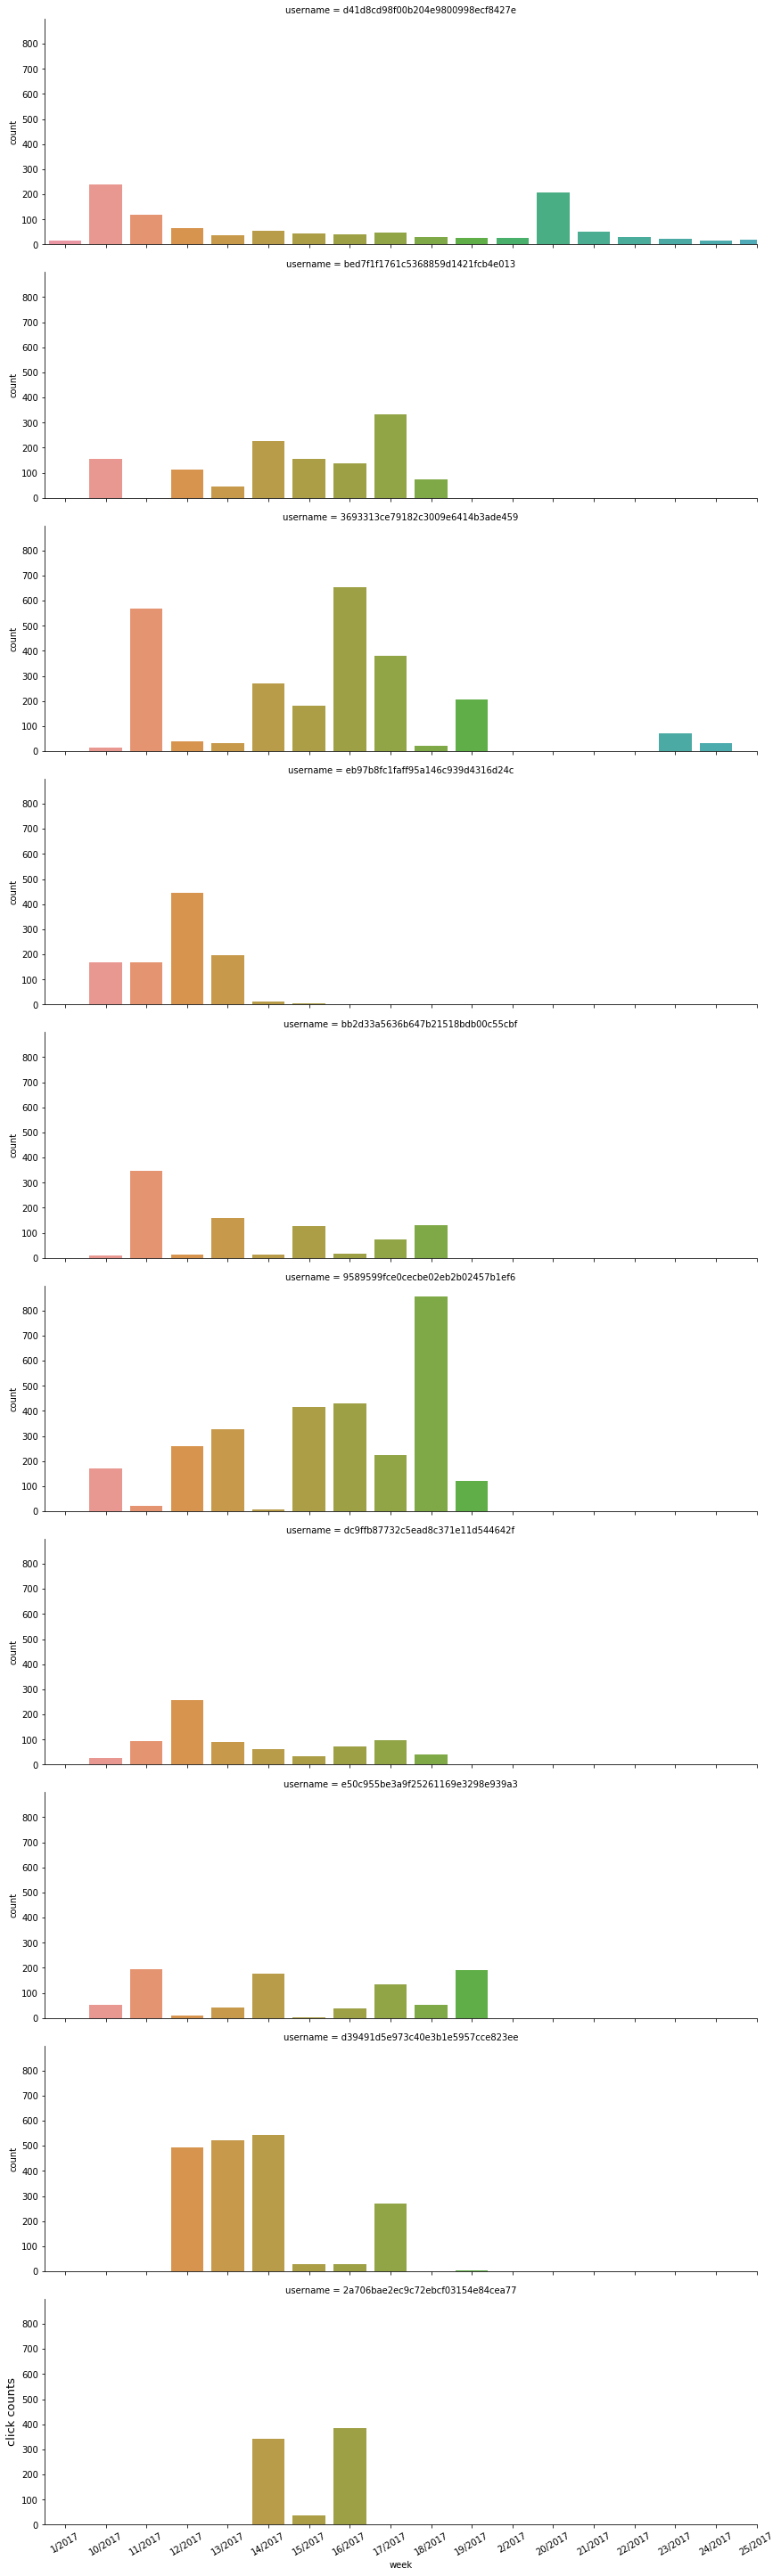

In [62]:
#user d41d8cd98f00b204e9800998ecf8427e is a biggg outlier...course administrator???

sns.catplot(x = "week_year", y = "count", col_wrap = 1, 
            col = "username", data = top_user_week_counts, kind = "bar",
            height = 4, aspect = 3)
# plt.title("Counts over time for mobile user " + str(top_user_week_counts['username'][count]), fontsize = 14)
plt.xlabel('week', fontsize = 10)
plt.ylabel('click counts', fontsize = 13)
plt.xticks(rotation = 30)
plt.xlim(-.50,17)
plt.show()

In [69]:
mobile_data_labeled = mobile_data
non_mobile_data_labeled = mobile_data
device_list = []

for count in range(len(mobile_data_labeled)):
     device_list.append('mobile')
mobile_data_labeled['device'] = device_list  

mobile_data_labeled.head(3)

,time,username,event_source,agent,name,device
0,2017-03-27 16:21:54.930867 UTC,1fc8371d6fb5d841af64503da54e4ec4,browser,Mozilla/5.0 (Linux; Android 7.1.1; A0001 Build...,problem_check,mobile
1,2017-03-27 12:55:42.111315 UTC,aa75ce9861e361e2201c070fee4876ae,browser,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,problem_check,mobile
2,2017-03-27 19:03:01.540341 UTC,f7c9b5ba8e176a40998faa3874f04378,browser,Mozilla/5.0 (Linux; Android 5.0.2; HTC One Bui...,problem_check,mobile
